In [1]:
# !pip install scikit-learn
# !pip install numpy
# !pip install matplotlib

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Рисуем симпатичные рисунки
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Указываем куда сохранять рисунки
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [5]:
#Сохраняем картинки с цифрами
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
 path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
 print("Saving figure", fig_id)
 if tight_layout:
    plt.tight_layout()
 plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
#Выводим одну картинку с цифрой
def plot_digit(data):
 image = data.reshape(28, 28)
 plt.imshow(image, cmap = mpl.cm.binary,
 interpolation="nearest")
 plt.axis("off")

In [14]:
# Выводим много цифр…
def plot_digits(instances, images_per_row=10, **options):
 size = 28
 images_per_row = min(len(instances), images_per_row)

# Эквивалентно n_rows = ceil(len(instances) / images_per_row)
 n_rows = (len(instances) - 1) // images_per_row + 1
 # Добавляем пустое изображение, чтобы заполнить конец таблицы
 n_empty = n_rows * images_per_row - len(instances)
 padded_instances = np.concatenate([instances, np.zeros((n_empty,
size * size))], axis=0)
 # Изменяем массив так, чтобы он представлял сетку изображений 28×28
 image_grid = padded_instances.reshape((n_rows, images_per_row,
size, size))
 # Комбинируем оси 0 и 2 (вертик ось сетки и гориз ось
 # и оси 1 и 3 (гориз оси). Сначала перемещаем оси так,
 # чтобы они стояли друг за другом. Используем transpose()
 # Только после этого можно изменить форму массива
 big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
images_per_row * size)
 # Теперь мы получили большую картинку, которую не стыдно показать:
 plt.imshow(big_image, cmap = mpl.cm.binary, **options)
 plt.axis("off")


In [6]:
#Извлекаем датасет "Mnist" из хранилища OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
#Распаковываем картинки(массив с цветом каждого пикселя) и подписи к ним
X, y = mnist["data"], mnist["target"]

(70000, 784)

In [ ]:
#Выводим размер массива с картинками
X.shape

In [8]:
#Выводим размер массива с подписями
y.shape

(70000,)

In [16]:
some_digit = X[0] #Берём из массива с картинками первую картинку
some_digit_image = some_digit.reshape(28, 28) #меняем размер массива с выбранной картинкой (Из (756,1) в (28,28)) для дальнейшего удобного вывода
plt.imshow(some_digit_image, cmap=mpl.cm.binary) #Создаём "график" с выбранной картинкой и делаем её в формате  
plt.axis("off") #Выключаем отображение осей

(-0.5, 27.5, 27.5, -0.5)

Saving figure some_digit_plot


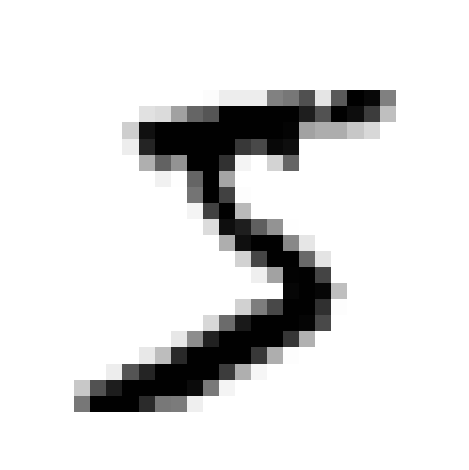

In [10]:
save_fig("some_digit_plot") #Сохраняем выбранную картинку
plt.show() #Выводим выбранную картинку

In [11]:
#Выводим первую подпись из массива с подписями
y[0]

'5'

In [12]:
#Меняем тип данных в массиве на uINT8
y = y.astype(np.uint8)

Saving figure more_digits_plot


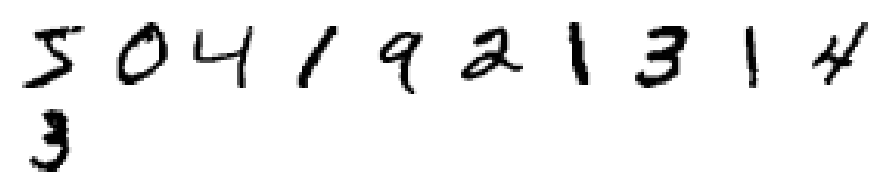

In [15]:
plt.figure(figsize=(9,9)) #Задаём размер "графика"
example_images = X[:100] #Берём последние 100 картинок из массива
plot_digits(example_images, images_per_row=10) #Создаём "график" с 100 картинками с цифрами, по 10 в каждой строке 
save_fig("more_digits_plot") #Сохраняем этот список из 100 картинок
plt.show() #Выводим "график"

In [22]:
def num_from_dataset(num, images, labels):
    nums = [int(num) for num in str(num)]
    return [(img, label) for img, label in zip(images, labels) if label in nums]

In [23]:
len(num_from_dataset(12, X, y))

14867